# Import Library

`data_loading` and `feature_engineering` are python files that I wrote. `data_loading` contains a function called load_data which you will use to load the dataframe, and `feature_engineering` contains a function called apply_feature_engineering which you will use to apply the feature engineering (so that we all use the same processed data in ML models).

**Before running this script, make sure you have downloaded 'itineraries_snappy.parquet' and are storing in a folder called 'data'**

You can upload these as normal libaries, as seen below:

In [6]:
from feature_engineering import apply_feature_engineering, add_dummies
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Data Loading
Here is where you will call the load_data function from data_loading --> there are no parameters needed

In [7]:
def load_data():
    """
    Load the dataset using parquet and pyarrow
    """
    df = pd.read_parquet(
        "itineraries_snappy.parquet", 
        engine= "pyarrow", 
        columns= [
            "searchDate", 
            "flightDate", 
            "startingAirport", 
            "destinationAirport",
            "travelDuration", 
            "isBasicEconomy", 
            "isRefundable", 
            "isNonStop", 
            "totalFare", 
            "seatsRemaining", 
            "totalTravelDistance",
            "segmentsDepartureTimeRaw", 
            "segmentsAirlineCode", 
            "segmentsCabinCode"
        ]
    )
    return df

In [3]:
# Call the load_data to get the data as a pandas dataframe
df = load_data()
df.head()

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsAirlineCode,segmentsCabinCode
0,2022-04-16,2022-04-17,ATL,BOS,PT2H29M,False,False,True,248.6,9,947.0,2022-04-17T12:57:00.000-04:00,DL,coach
1,2022-04-16,2022-04-17,ATL,BOS,PT2H30M,False,False,True,248.6,4,947.0,2022-04-17T06:30:00.000-04:00,DL,coach
2,2022-04-16,2022-04-17,ATL,BOS,PT2H30M,False,False,True,248.6,9,947.0,2022-04-17T11:35:00.000-04:00,DL,coach
3,2022-04-16,2022-04-17,ATL,BOS,PT2H32M,False,False,True,248.6,8,947.0,2022-04-17T13:59:00.000-04:00,DL,coach
4,2022-04-16,2022-04-17,ATL,BOS,PT2H34M,False,False,True,248.6,9,947.0,2022-04-17T09:59:00.000-04:00,DL,coach


In [4]:
# The data is too large to use in entirety, set a sample of 800,000 rows
sample_size = 800000

# Get the first 800,000 rows
df_sample = df.iloc[:sample_size]

# Feature Engineering
Here is where you will call the apply_feature_engineering function from feature_engineering --> there are no parameters needed

In [5]:
# Call the apply_feature_engineering function from feature_engineering to get the data ready for ML Modeling
df_sample = apply_feature_engineering(df_sample)

Starting feature engineering...
Converting date columns...
Date conversion done. Time elapsed: 0.16s
Extracting travel duration...
Travel duration extraction done. Time elapsed: 0.95s
Imputing missing travel distances...
Imputation done. Time elapsed: 0.99s
Processing departure times...
Departure time processing done. Time elapsed: 134.37s
Extracting departure hour and float...
Departure time extraction done. Time elapsed: 134.40s
Processing airline codes...
Airline code processing done. Time elapsed: 135.05s
Processing cabin codes...
Cabin class processing done. Time elapsed: 136.17s
Binning seatsRemaining...
Seats binning done. Time elapsed: 136.21s
Calculating days to departure...
Day of week processing done. Time elapsed: 136.25s
Processing holiday features...
Holiday features processing done. Time elapsed: 136.28s
Dropping columns...
Dropping columns done. Time elapsed: 136.34s
Renaming columns...
Renaming done. Total time elapsed: 136.34s
Adding dummies...
Dummies added. Total ti

In [6]:
# You should see the following columns and data types
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   travelDuration            800000 non-null  int64   
 1   isRefundable              800000 non-null  bool    
 2   isNonStop                 800000 non-null  bool    
 3   totalFare                 800000 non-null  float64 
 4   seatsRemaining            800000 non-null  int64   
 5   totalTravelDistance       751962 non-null  float64 
 6   travelDistance            800000 non-null  int64   
 7   departureTimeHour         800000 non-null  int32   
 8   departureTimeFloat        800000 non-null  float64 
 9   binnedSeatsRemaining      798145 non-null  category
 10  daysToDeparture           800000 non-null  int64   
 11  departureDayOfWeek        800000 non-null  int32   
 12  isWeekend                 800000 non-null  bool    
 13  isHoliday                 800

In [7]:
# The first 5 rows should look like this
df_sample.head()

,travelDuration,isRefundable,isNonStop,totalFare,seatsRemaining,totalTravelDistance,travelDistance,departureTimeHour,departureTimeFloat,binnedSeatsRemaining,...,destinationAirport_IAD,destinationAirport_JFK,destinationAirport_LAX,destinationAirport_LGA,destinationAirport_MIA,destinationAirport_OAK,destinationAirport_ORD,destinationAirport_PHL,destinationAirport_SFO,cabinClass_basic economy
0,149,False,True,248.6,9,947.0,947,16,16.950000,2,...,False,False,False,False,False,False,False,False,False,False
1,150,False,True,248.6,4,947.0,947,10,10.500000,1,...,False,False,False,False,False,False,False,False,False,False
2,150,False,True,248.6,9,947.0,947,15,15.583333,2,...,False,False,False,False,False,False,False,False,False,False
3,152,False,True,248.6,8,947.0,947,17,17.983333,2,...,False,False,False,False,False,False,False,False,False,False
4,154,False,True,248.6,9,947.0,947,13,13.983333,2,...,False,False,False,False,False,False,False,False,False,False


# Example ML Modeling: Decision Tree
You can now use sklearn as normal --> see below:

In [8]:
# Instantiate decision tree regressor (since we predicting price, not classifying)
dt = DecisionTreeRegressor(random_state= 42)

In [9]:
# Our X variables in these models will be all columns that are not price
X = df_sample.drop(columns= ['totalFare'], axis= 1)

# Our y variable is of course price which is called 'totalFare'
y = df_sample['totalFare']

# Split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [10]:
# Fit and predict the data
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [11]:
# Calculate the error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the error metrics using four decimal places
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Sqaured Error: {mse:.4f}")
print(f"Root Mean Squared Error {rmse:0.4f}")
print(f"Mean Absolute Percentage Error: {mape:.4%}")
print(f"R2: {r2:.4f}")

Mean Absolute Error: 47.3132
Mean Sqaured Error: 15164.5751
Root Mean Squared Error 123.1445
Mean Absolute Percentage Error: 14.4501%
R2: 0.7248


# Decision Tree

In [12]:
# Preparing the data
X = df_sample.drop(columns=['totalFare'], axis=1)
y = df_sample['totalFare']

In [13]:
# Handling category columns
for col in X.select_dtypes(include=['category']).columns:
    X[col] = X[col].cat.codes

# Train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (640000, 45), Test set size: (160000, 45)


In [14]:
# Model performance metrics
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Percentage Error: {mape:.4%}")
    print(f"R² Score: {r2:.4f}")
    
    return y_pred, mae, rmse, mape, r2


In [15]:
from sklearn.model_selection import GridSearchCV
import time

# Smaller sample for hyperparameter tuning to save time
sample_indices = np.random.choice(len(X_train), min(100000, len(X_train)), replace=False)
X_train_sample = X_train.iloc[sample_indices]
y_train_sample = y_train.iloc[sample_indices]
print(f"Using {len(X_train_sample)} samples for hyperparameter tuning")

# Decision Tree Hyperparameter Tuning
print("\n--- Decision Tree Hyperparameter Tuning ---")
dt_param_grid = {
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=dt_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("Training Decision Tree models...")
start_time = time.time()
dt_grid.fit(X_train_sample, y_train_sample)
dt_tuning_time = time.time() - start_time
print(f"Decision Tree tuning completed in {dt_tuning_time:.2f} seconds")

print("Best Decision Tree parameters:")
print(dt_grid.best_params_)
print(f"Best CV score: {-dt_grid.best_score_:.4f} RMSE")


Using 100000 samples for hyperparameter tuning

--- Decision Tree Hyperparameter Tuning ---
Training Decision Tree models...
Fitting 3 folds for each of 240 candidates, totalling 720 fits
Decision Tree tuning completed in 18.13 seconds
Best Decision Tree parameters:
{'max_depth': 25, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20}
Best CV score: 170.3322 RMSE


In [16]:
# Saving best Decision Tree model
best_dt = dt_grid.best_estimator_
best_dt.fit(X_train, y_train)  # Refit on full training data
dt_val_pred, dt_val_mae, dt_val_rmse, dt_val_mape, dt_val_r2 = evaluate_model(
    best_dt, X_test, y_test, "Best Decision Tree (Validation)"
)


Best Decision Tree (Validation) Performance Metrics:
Mean Absolute Error: 63.8122
Root Mean Squared Error: 124.5687
Mean Absolute Percentage Error: 20.1973%
R² Score: 0.7184


In [17]:
#Running the model with the best parameters on the whole dataset
dt_best = DecisionTreeRegressor(random_state=42, **dt_grid.best_params_)
dt_best.fit(X_train, y_train)
dt_best_pred, dt_best_mae, dt_best_rmse, dt_best_mape, dt_best_r2 = evaluate_model(dt_best, X_test, y_test, "Best Decision Tree")

#Saving the model results 
model_results = {
    "Model": ["Decision Tree", "Best Decision Tree", "Best Decision Tree (Validation)"],
    "MAE": [mae, dt_best_mae, dt_val_mae],
    "RMSE": [rmse, dt_best_rmse, dt_val_rmse],
    "MAPE": [mape, dt_best_mape, dt_val_mape],
    "R²": [r2, dt_best_r2, dt_val_r2]
}


Best Decision Tree Performance Metrics:
Mean Absolute Error: 63.8122
Root Mean Squared Error: 124.5687
Mean Absolute Percentage Error: 20.1973%
R² Score: 0.7184


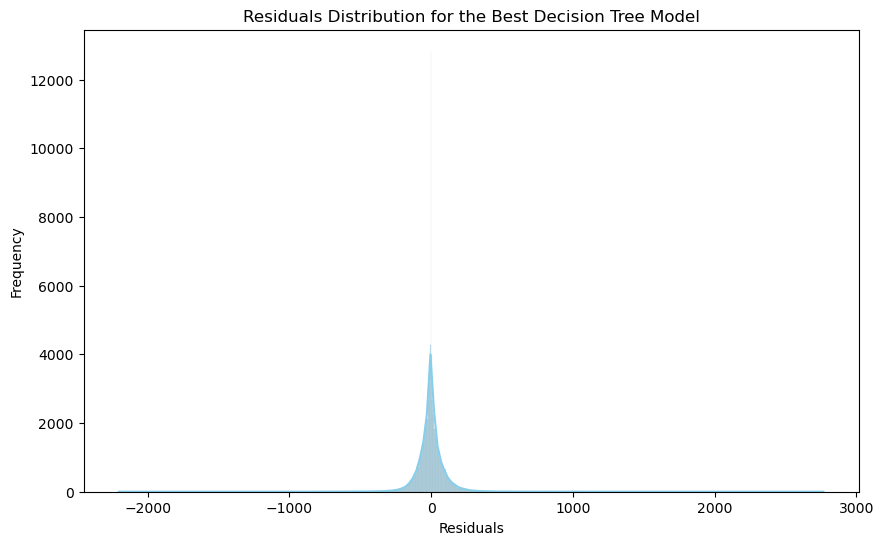

In [18]:
#Residuals
residuals = y_test - dt_best_pred

#Plotting the residuals
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Residuals Distribution for the Best Decision Tree Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

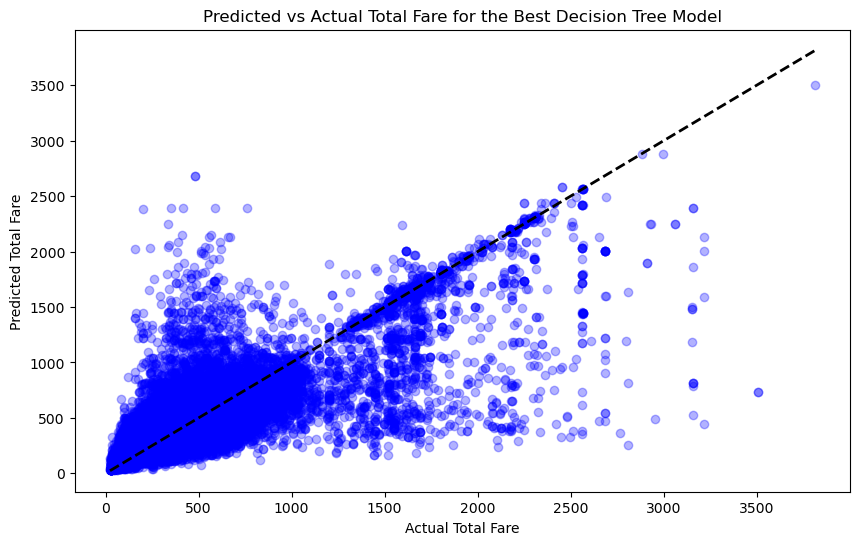

In [19]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_best_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Total Fare')
plt.ylabel('Predicted Total Fare')
plt.title('Predicted vs Actual Total Fare for the Best Decision Tree Model')
plt.show()

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Hyperparameter Tuning
print("\n--- Random Forest Hyperparameter Tuning ---")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=rf_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("Training Random Forest models...")
start_time = time.time()
rf_grid.fit(X_train_sample, y_train_sample)
rf_tuning_time = time.time() - start_time
print(f"Random Forest tuning completed in {rf_tuning_time:.2f} seconds")

print("Best Random Forest parameters:")
print(rf_grid.best_params_)
print(f"Best CV score: {-rf_grid.best_score_:.4f} RMSE")


--- Random Forest Hyperparameter Tuning ---
Training Random Forest models...
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Random Forest tuning completed in 411.69 seconds
Best Random Forest parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 136.7433 RMSE


In [22]:
# Saving best Random Forest model
best_rf = rf_grid.best_estimator_
best_rf.fit(X_train, y_train)  
rf_val_pred, rf_val_mae, rf_val_rmse, rf_val_mape, rf_val_r2 = evaluate_model(
    best_rf, X_test, y_test, "Best Random Forest (Validation)"
)


Best Random Forest (Validation) Performance Metrics:
Mean Absolute Error: 44.8739
Root Mean Squared Error: 93.7698
Mean Absolute Percentage Error: 14.1297%
R² Score: 0.8405


In [23]:
#Running the model with the best parameters on the whole dataset
rf_best = RandomForestRegressor(random_state=42, n_jobs=-1, **rf_grid.best_params_)
rf_best.fit(X_train, y_train)
rf_best_pred, rf_best_mae, rf_best_rmse, rf_best_mape, rf_best_r2 = evaluate_model(rf_best, X_test, y_test, "Best Random Forest")

#Saving the model results
model_results["Model"].extend(["Random Forest", "Best Random Forest", "Best Random Forest (Validation)"])
model_results["MAE"].extend([mae, rf_best_mae, rf_val_mae])
model_results["RMSE"].extend([rmse, rf_best_rmse, rf_val_rmse])
model_results["MAPE"].extend([mape, rf_best_mape, rf_val_mape])
model_results["R²"].extend([r2, rf_best_r2, rf_val_r2])


Best Random Forest Performance Metrics:
Mean Absolute Error: 44.8739
Root Mean Squared Error: 93.7698
Mean Absolute Percentage Error: 14.1297%
R² Score: 0.8405


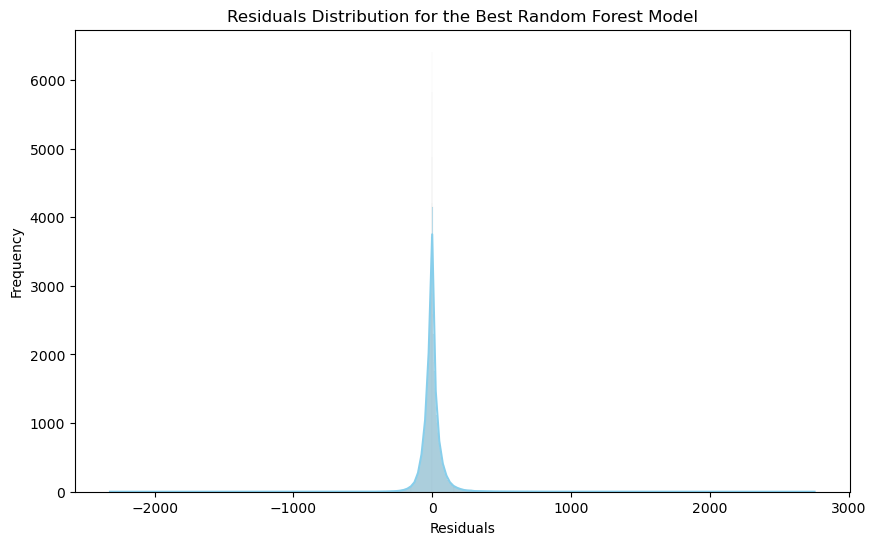

In [24]:
#Residuals
residuals_rf = y_test - rf_best_pred

#Plotting the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True, color='skyblue')
plt.title("Residuals Distribution for the Best Random Forest Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

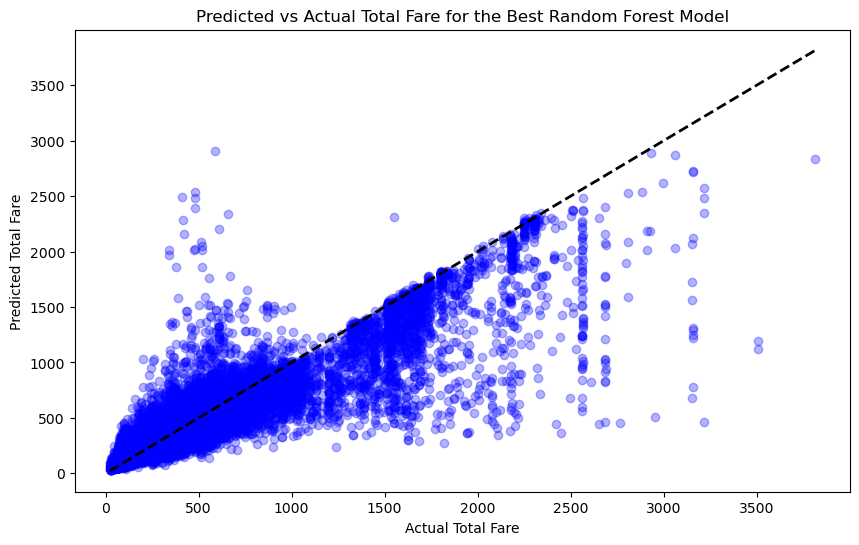

In [25]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_best_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Total Fare')
plt.ylabel('Predicted Total Fare')
plt.title('Predicted vs Actual Total Fare for the Best Random Forest Model')
plt.show()

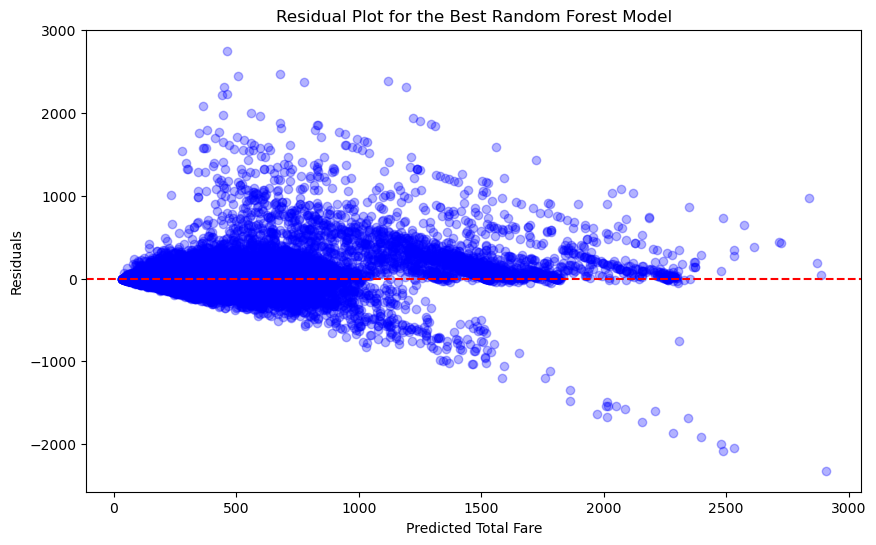

In [26]:
#Residual Plot to check the distribution of errors
plt.figure(figsize=(10, 6))
plt.scatter(rf_best_pred, residuals_rf, alpha=0.3, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot for the Best Random Forest Model")
plt.xlabel("Predicted Total Fare")
plt.ylabel("Residuals")
plt.show()

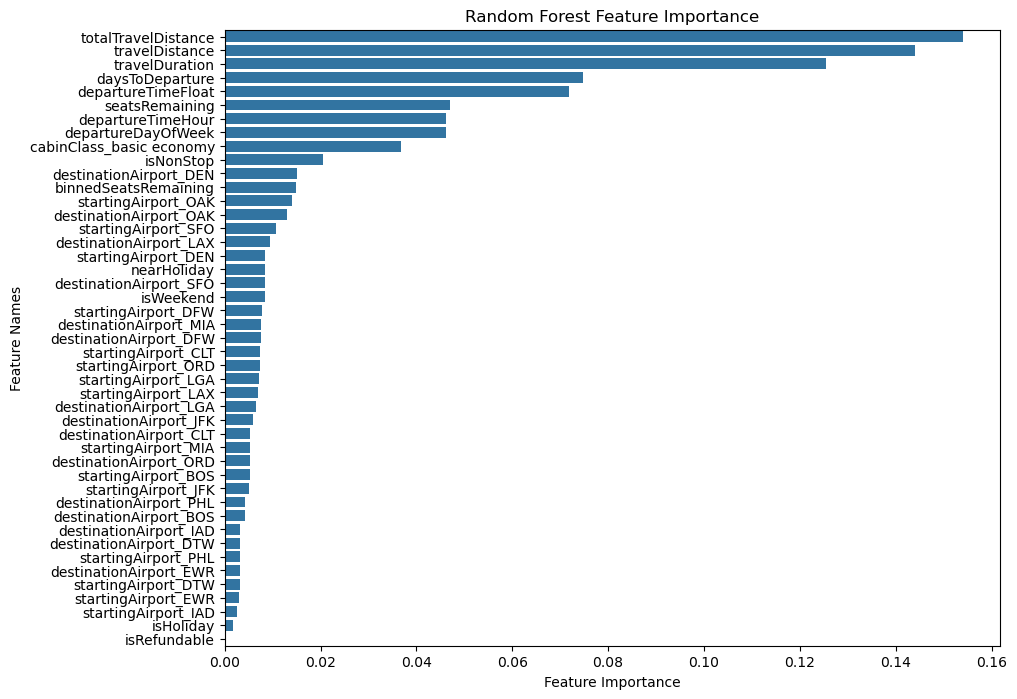

In [27]:
#Feature Importance Visualization
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

plot_feature_importance(best_rf.feature_importances_, X_train.columns, 'Random Forest')

# XG Boost

In [29]:
# XGBoost Hyperparameter Tuning
%pip install xgboost
from xgboost import XGBRegressor

print("\n--- XGBoost Hyperparameter Tuning ---")
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42, n_jobs=-1),
    param_grid=xgb_param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

print("Training XGBoost models...")
start_time = time.time()
xgb_grid.fit(X_train_sample, y_train_sample)
xgb_tuning_time = time.time() - start_time
print(f"XGBoost tuning completed in {xgb_tuning_time:.2f} seconds")

print("Best XGBoost parameters:")
print(xgb_grid.best_params_)
print(f"Best CV score: {-xgb_grid.best_score_:.4f} RMSE")

Note: you may need to restart the kernel to use updated packages.

--- XGBoost Hyperparameter Tuning ---
Training XGBoost models...
Fitting 3 folds for each of 432 candidates, totalling 1296 fits
XGBoost tuning completed in 144.61 seconds
Best XGBoost parameters:
{'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.9}
Best CV score: 125.9485 RMSE


In [30]:
# Saving best XGBoost model
best_xgb = xgb_grid.best_estimator_
best_xgb.fit(X_train, y_train)  
xgb_val_pred, xgb_val_mae, xgb_val_rmse, xgb_val_mape, xgb_val_r2 = evaluate_model(
    best_xgb, X_test, y_test, "Best XGBoost (Validation)"
)


Best XGBoost (Validation) Performance Metrics:
Mean Absolute Error: 56.6011
Root Mean Squared Error: 99.7094
Mean Absolute Percentage Error: 18.6989%
R² Score: 0.8196


In [31]:
#Running the model with the best parameters on the whole dataset
xgb_best = XGBRegressor(random_state=42, n_jobs=-1, **xgb_grid.best_params_)
xgb_best.fit(X_train, y_train)
xgb_best_pred, xgb_best_mae, xgb_best_rmse, xgb_best_mape, xgb_best_r2 = evaluate_model(xgb_best, X_test, y_test, "Best XGBoost")

#Saving the model results
model_results["Model"].extend(["XGBoost", "Best XGBoost", "Best XGBoost (Validation)"])
model_results["MAE"].extend([mae, xgb_best_mae, xgb_val_mae])
model_results["RMSE"].extend([rmse, xgb_best_rmse, xgb_val_rmse])
model_results["MAPE"].extend([mape, xgb_best_mape, xgb_val_mape])
model_results["R²"].extend([r2, xgb_best_r2, xgb_val_r2])


Best XGBoost Performance Metrics:
Mean Absolute Error: 56.6011
Root Mean Squared Error: 99.7094
Mean Absolute Percentage Error: 18.6989%
R² Score: 0.8196


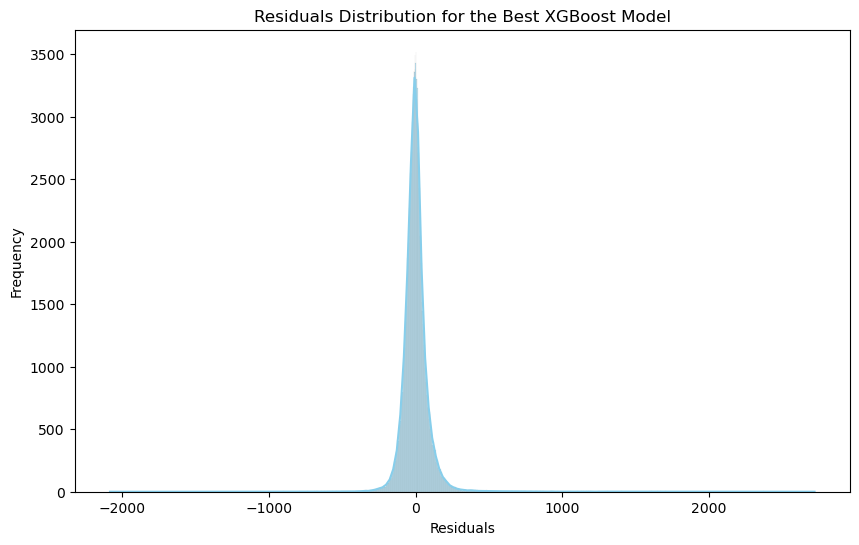

In [32]:
#Residuals
residuals_xgb = y_test - xgb_best_pred

#Plotting the residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgb, kde=True, color='skyblue')
plt.title("Residuals Distribution for the Best XGBoost Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

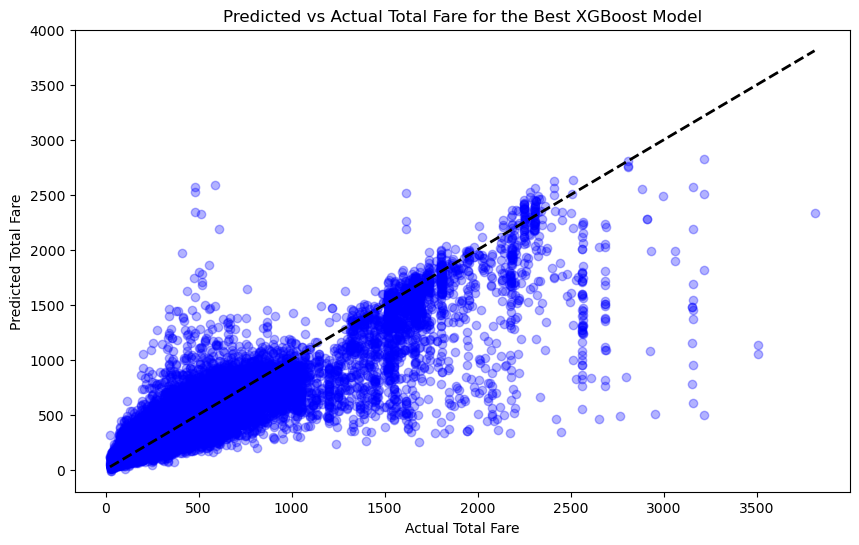

In [33]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_best_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Total Fare')
plt.ylabel('Predicted Total Fare')
plt.title('Predicted vs Actual Total Fare for the Best XGBoost Model')
plt.show()

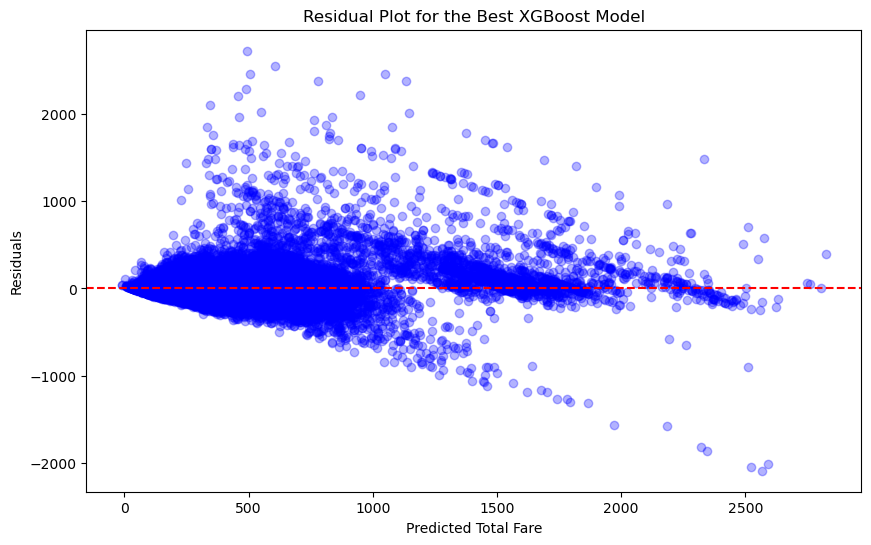

In [34]:
#Residual Plot to check the distribution of errors
plt.figure(figsize=(10, 6))
plt.scatter(xgb_best_pred, residuals_xgb, alpha=0.3, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot for the Best XGBoost Model")
plt.xlabel("Predicted Total Fare")
plt.ylabel("Residuals")
plt.show()

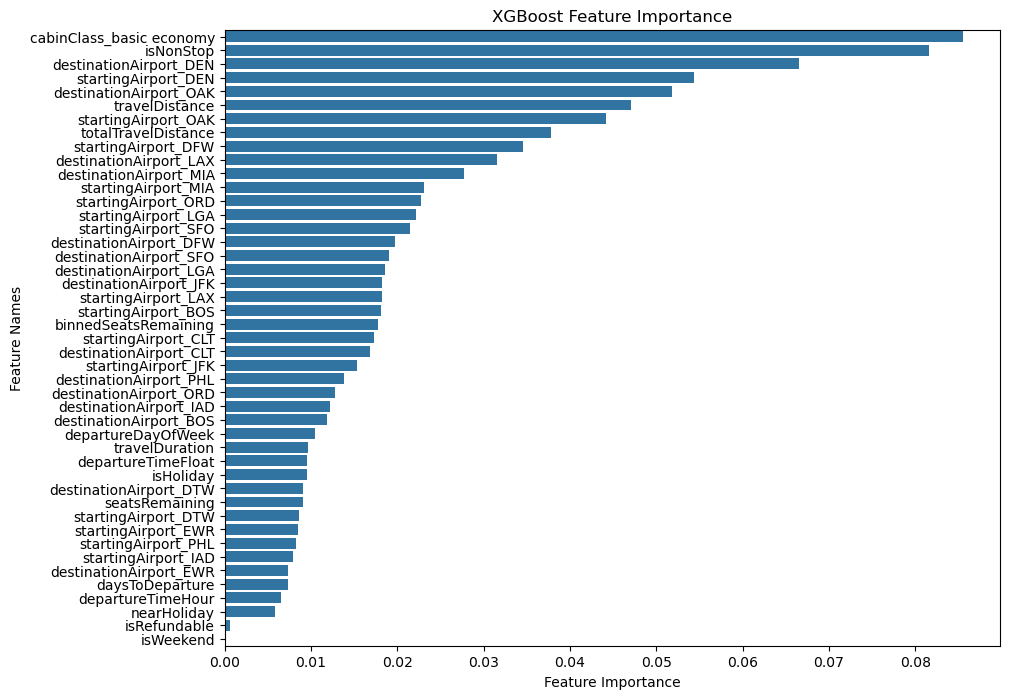

In [35]:
#Feature Importance Visualization
plot_feature_importance(best_xgb.feature_importances_, X_train.columns, 'XGBoost')

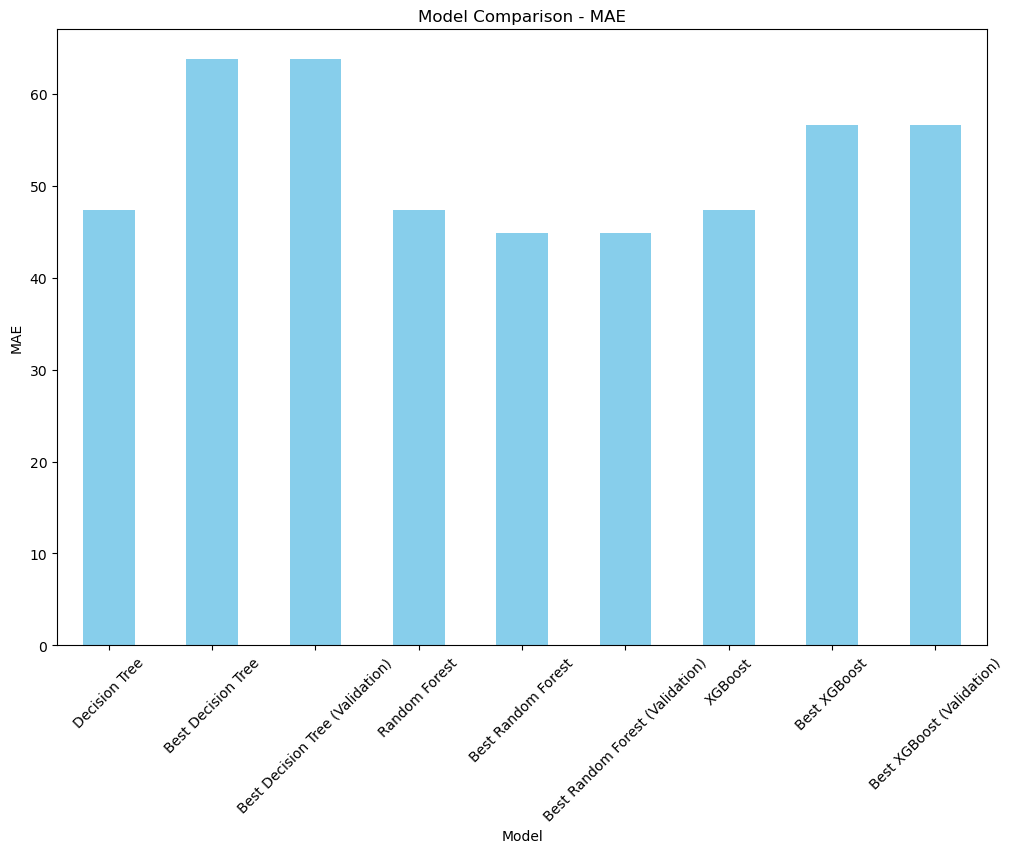

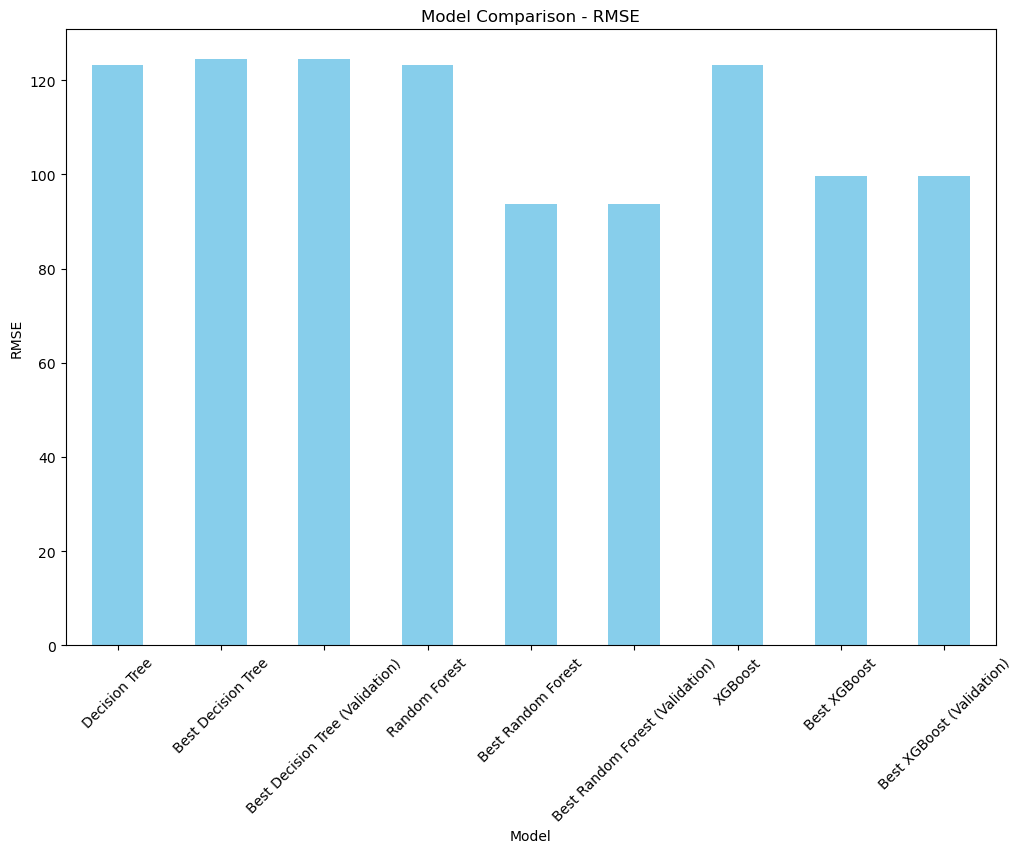

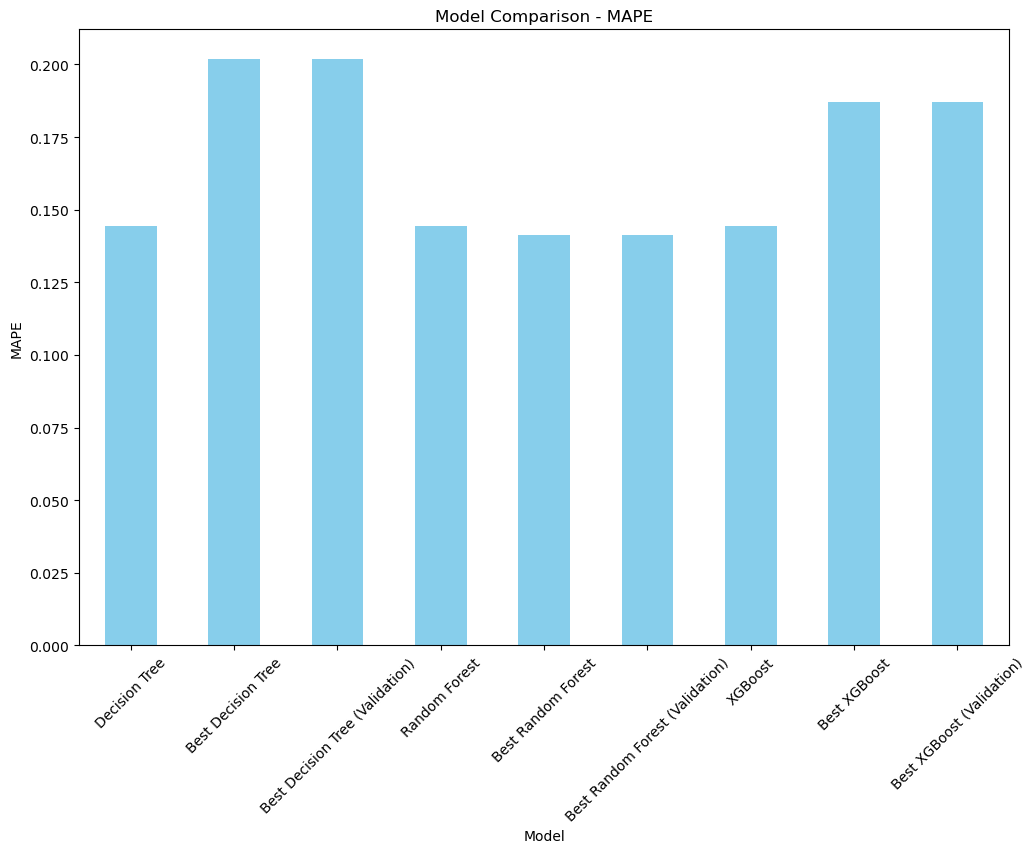

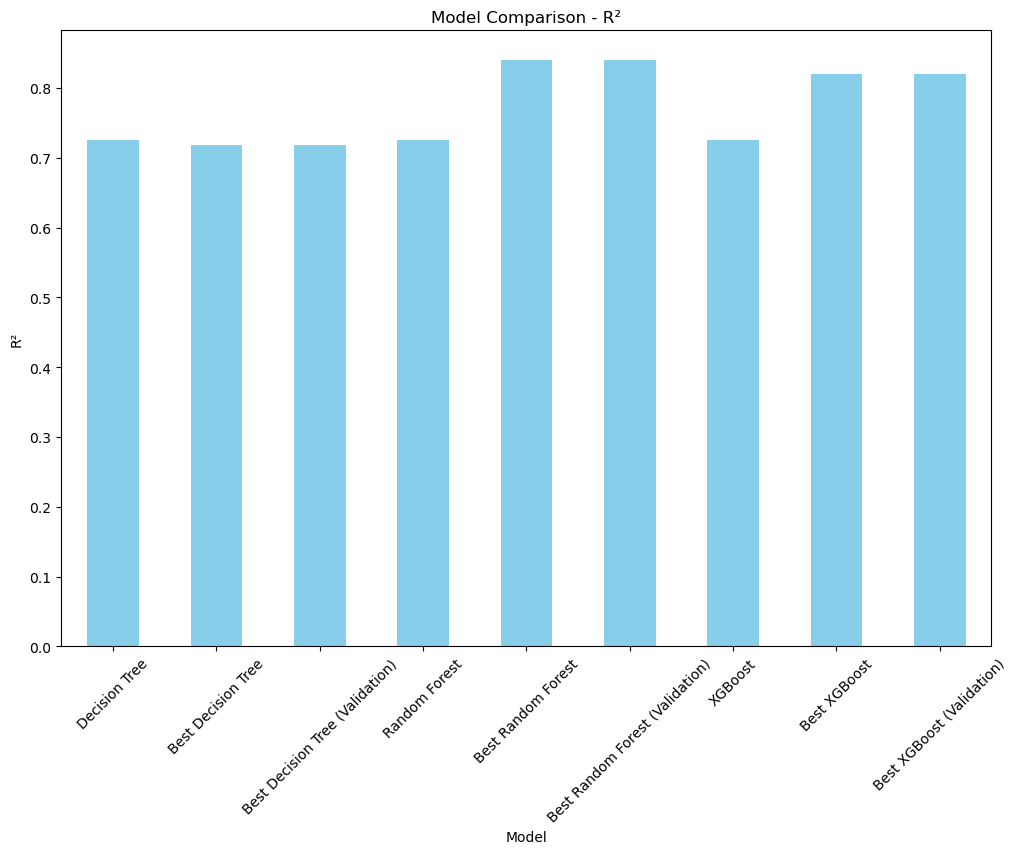

In [37]:
#Table for all the model validations
model_results_df = pd.DataFrame(model_results)
model_results_df.set_index('Model', inplace=True)
model_results_df

# Plotting each metric separately
metrics = ['MAE', 'RMSE', 'MAPE', 'R²']

for metric in metrics:
    plt.figure(figsize=(12, 8))
    model_results_df[metric].plot(kind='bar', color='skyblue')
    plt.title(f"Model Comparison - {metric}")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()


In [38]:
#Table for all the model validations
model_results_df = pd.DataFrame(model_results)
model_results_df.set_index('Model', inplace=True)
model_results_df

,MAE,RMSE,MAPE,R²
Model,,,,
Decision Tree,47.313173,123.144529,0.144501,0.724841
Best Decision Tree,63.812199,124.568660,0.201973,0.718440
Best Decision Tree (Validation),63.812199,124.568660,0.201973,0.718440
Random Forest,47.313173,123.144529,0.144501,0.724841
Best Random Forest,44.873878,93.769835,0.141297,0.840456
Best Random Forest (Validation),44.873878,93.769835,0.141297,0.840456
XGBoost,47.313173,123.144529,0.144501,0.724841
Best XGBoost,56.601105,99.709427,0.186989,0.819604
Best XGBoost (Validation),56.601105,99.709427,0.186989,0.819604


# LSTM

In [65]:
#%pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [67]:
df1 = load_data()
df1.head()

,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,seatsRemaining,totalTravelDistance,segmentsDepartureTimeRaw,segmentsAirlineCode,segmentsCabinCode
0,2022-04-16,2022-04-17,ATL,BOS,PT2H29M,False,False,True,248.6,9,947.0,2022-04-17T12:57:00.000-04:00,DL,coach
1,2022-04-16,2022-04-17,ATL,BOS,PT2H30M,False,False,True,248.6,4,947.0,2022-04-17T06:30:00.000-04:00,DL,coach
2,2022-04-16,2022-04-17,ATL,BOS,PT2H30M,False,False,True,248.6,9,947.0,2022-04-17T11:35:00.000-04:00,DL,coach
3,2022-04-16,2022-04-17,ATL,BOS,PT2H32M,False,False,True,248.6,8,947.0,2022-04-17T13:59:00.000-04:00,DL,coach
4,2022-04-16,2022-04-17,ATL,BOS,PT2H34M,False,False,True,248.6,9,947.0,2022-04-17T09:59:00.000-04:00,DL,coach


In [69]:
# The data is too large to use in entirety, set a sample of 800,000 rows
sample_size = 800000

# Get the first 800,000 rows
df_sample1 = df1.iloc[:sample_size]

In [70]:
# Call the apply_feature_engineering function from feature_engineering to get the data ready for ML Modeling
df_sample1 = apply_feature_engineering(df_sample1)

Starting feature engineering...
Converting date columns...
Date conversion done. Time elapsed: 0.31s
Extracting travel duration...
Travel duration extraction done. Time elapsed: 2.56s
Imputing missing travel distances...
Imputation done. Time elapsed: 2.67s
Processing departure times...
Departure time processing done. Time elapsed: 136.18s
Extracting departure hour and float...
Departure time extraction done. Time elapsed: 136.24s
Processing airline codes...
Airline code processing done. Time elapsed: 137.14s
Processing cabin codes...
Cabin class processing done. Time elapsed: 138.55s
Binning seatsRemaining...
Seats binning done. Time elapsed: 138.57s
Calculating days to departure...
Day of week processing done. Time elapsed: 138.69s
Processing holiday features...
Holiday features processing done. Time elapsed: 138.77s
Dropping columns...
Dropping columns done. Time elapsed: 138.88s
Renaming columns...
Renaming done. Total time elapsed: 138.89s
Adding dummies...
Dummies added. Total ti

In [71]:
# Target variable
y = df_sample1['totalFare'].values
# Extracting the features
X = df_sample1.drop(columns=['totalFare']).values

# Training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [72]:
# Scaling features
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling target
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))


In [73]:
# Sequence for LSTM
def create_sequences(X, y, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:(i + time_steps)])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)


time_steps = 10 # How many steps to look back
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)

# Shapes to verify
print(f"X_train_seq shape: {X_train_seq.shape}")
print(f"y_train_seq shape: {y_train_seq.shape}")
print(f"X_test_seq shape: {X_test_seq.shape}")
print(f"y_test_seq shape: {y_test_seq.shape}")

X_train_seq shape: (639990, 10, 45)
y_train_seq shape: (639990, 1)
X_test_seq shape: (159990, 10, 45)
y_test_seq shape: (159990, 1)


In [74]:
# Model
tf.keras.backend.clear_session()

# Model architecture
model = Sequential([
    # LSTM layer with return sequences True for stacked LSTM
    LSTM(50, activation='relu', return_sequences=True, 
         input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2),  # To prevent overfitting
    
    # Second LSTM layer
    LSTM(50, activation='relu'),
    Dropout(0.2),
    
    # Output layer for regression
    Dense(1)
])

# Adam optimizer and mse loss
model.compile(optimizer='adam', loss='mse')

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,451 (154.11 KB)

 Trainable params: 39,451 (154.11 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Training the model with early stopping and model checkpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)

# Model checkpoint to save the best model
model_checkpoint = ModelCheckpoint(
    'best_lstm_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Train 
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

Epoch 1/50
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 1: val_loss did not improve from inf
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: nan - val_loss: nan
Epoch 2/50
15987/16000 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 2: val_loss did not improve from inf
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
15996/16000 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 3: val_loss did not improve from inf
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
15998/16000 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 4: val_loss did not improve from inf
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
15999/16000 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 5: val_loss did not improve from inf
16000/16000 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
15986/16000 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan
Epoch 6

#Check this part

In [78]:
# Handle NaN values by imputing with the mean of the respective columns
X_train_seq = np.nan_to_num(X_train_seq, nan=np.nanmean(X_train_seq))
X_test_seq = np.nan_to_num(X_test_seq, nan=np.nanmean(X_test_seq))
y_train_seq = np.nan_to_num(y_train_seq, nan=np.nanmean(y_train_seq))
y_test_seq = np.nan_to_num(y_test_seq, nan=np.nanmean(y_test_seq))

# Model evaluation
# Predictions
y_train_pred_scaled = model.predict(X_train_seq)
y_test_pred_scaled = model.predict(X_test_seq)

# Inverse transform to the original scale
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_train_actual = scaler_y.inverse_transform(y_train_seq)
y_test_actual = scaler_y.inverse_transform(y_test_seq)

# Metrics
mse = mean_squared_error(y_test_actual, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, y_test_pred)
r2 = r2_score(y_test_actual, y_test_pred)
mape = np.mean(np.abs((y_test_actual - y_test_pred) / y_test_actual)) * 100

print(f'Training MSE: {mean_squared_error(y_train_actual, y_train_pred):.2f}')
print(f'Test MSE: {mse:.2f}')
print(f'Test RMSE: {rmse:.2f}')
print(f'Test MAE: {mae:.2f}')
print(f'Test R² Score: {r2:.4f}')
print(f'Test MAPE: {mape:.2f}%')


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 16s 800us/step
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 4s 814us/step


ValueError: Input contains NaN.

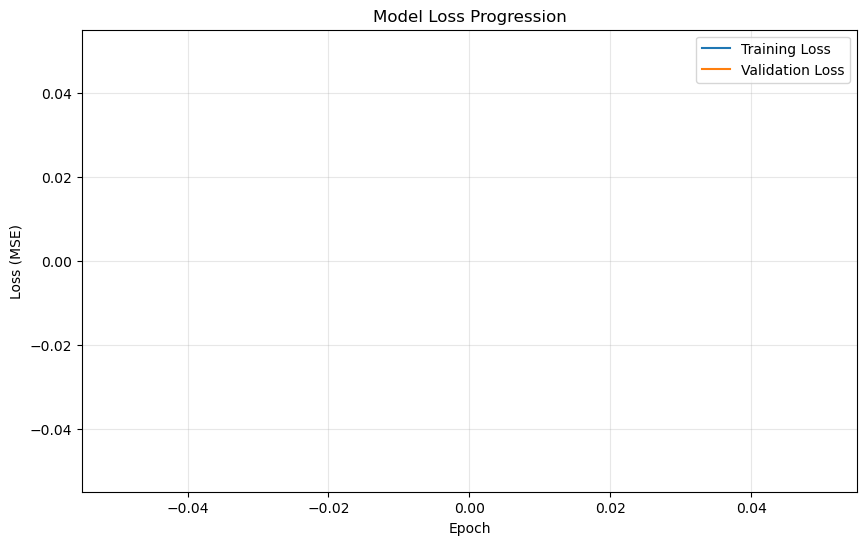

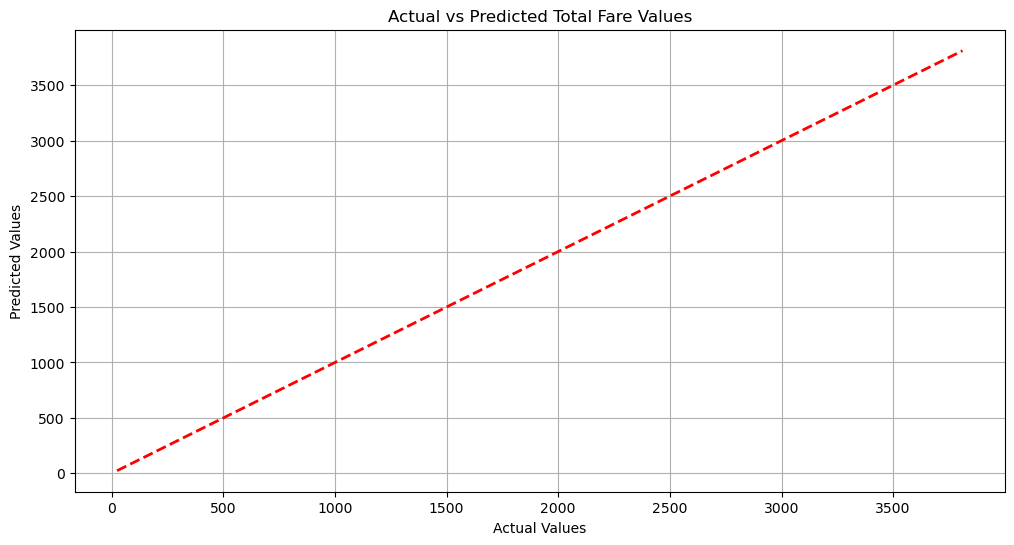

In [79]:
#VISUALIZATIONS

# Training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test_actual, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test_actual.min(), y_test_actual.max()], 
         [y_test_actual.min(), y_test_actual.max()], 
         'r--', lw=2)
plt.title('Actual vs Predicted Total Fare Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

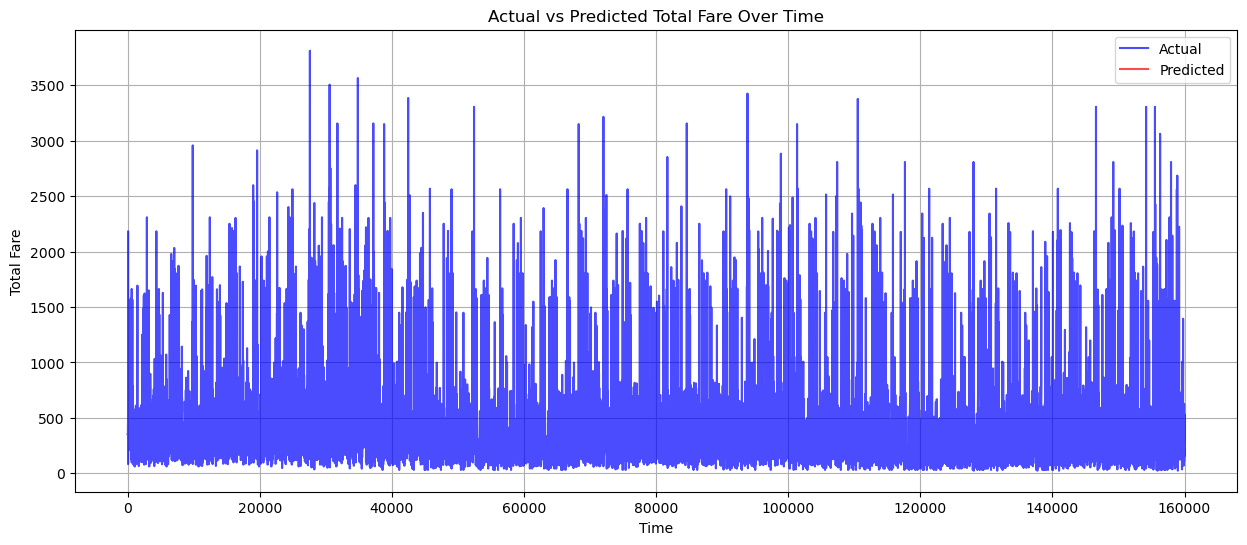

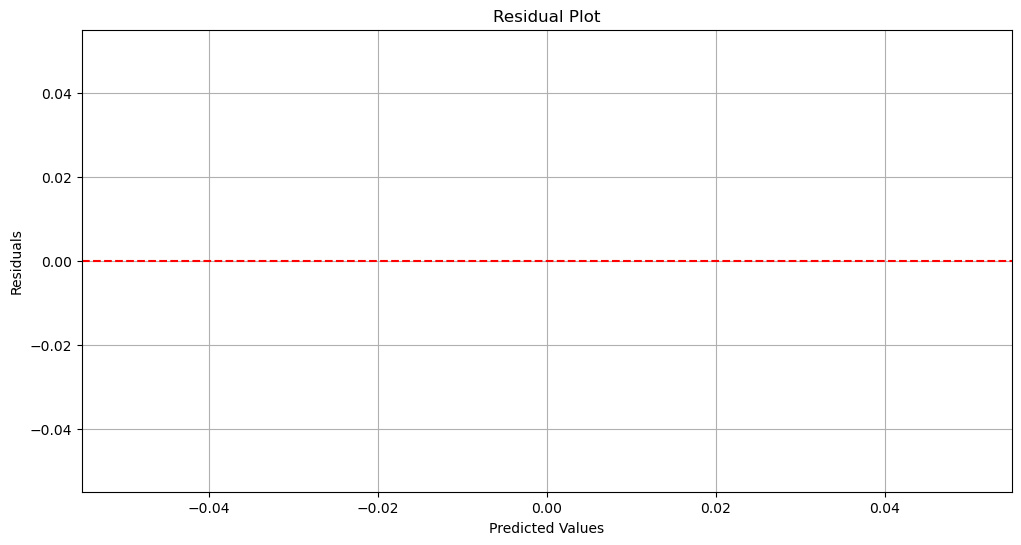

ValueError: autodetected range of [nan, nan] is not finite

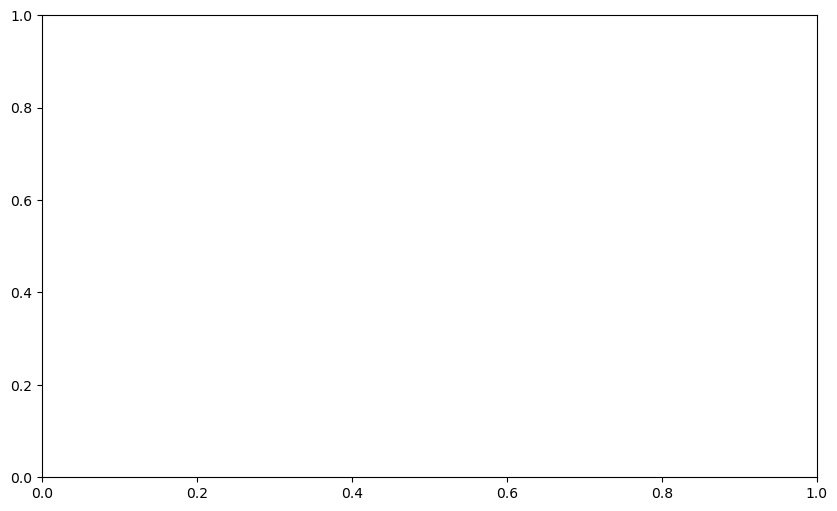

In [80]:
# Plotting predictions vs actual over time
plt.figure(figsize=(15, 6))

# Check NaN values in the data
y_test_actual_plot = np.nan_to_num(y_test_actual, nan=np.nanmean(y_test_actual))
y_test_pred_plot = np.nan_to_num(y_test_pred, nan=np.nanmean(y_test_pred))

plt.plot(y_test_actual_plot, label='Actual', color='blue', alpha=0.7)
plt.plot(y_test_pred_plot, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Total Fare Over Time')
plt.xlabel('Time')
plt.ylabel('Total Fare')
plt.legend()
plt.grid(True)
plt.show()

# Residuals
residuals = y_test_actual_plot - y_test_pred_plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test_pred_plot, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

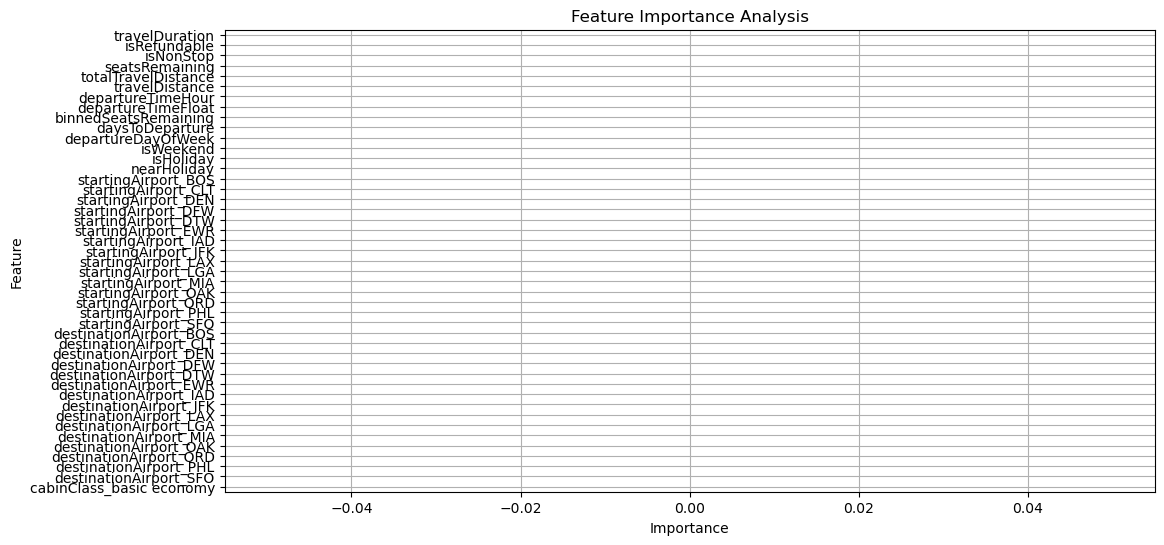

In [83]:
# Feature Importance Analysis
# Since LSTM doesn't directly provide feature importance, we'll analyze correlations

# Extracting feature names assuming df is available
feature_names = df_sample1.drop(columns=['totalFare']).columns.tolist()

# Function to calculate feature importance using permutation importance
def permutation_importance(model, X, y, n_repeats=5):
    """Calculate permutation importance for features"""
    baseline_loss = model.evaluate(X, y, verbose=0)
    importances = []
    
    for i in range(X.shape[2]):  # Loop through features
        # Clone the dataset
        X_permuted = X.copy()
        # Calculate importance over multiple repeats
        feature_importance = []
        for _ in range(n_repeats):
            # Permute the feature
            for seq_idx in range(X.shape[0]):
                np.random.shuffle(X_permuted[seq_idx, :, i])
            # Calculate loss with permuted feature
            permuted_loss = model.evaluate(X_permuted, y, verbose=0)
            # Importance is the increase in loss
            importance = permuted_loss - baseline_loss
            feature_importance.append(importance)
        # Take the mean importance across repeats
        importances.append(np.mean(feature_importance))
    
    return importances

# Calculate feature importance
feature_importance = permutation_importance(model, X_test_seq, y_test_seq)

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
plt.title('Feature Importance Analysis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


In [84]:
# Alternative: correlation with target
correlations = [np.corrcoef(X_train[:, i], y_train.flatten())[0, 1] for i in range(X_train.shape[1])]
    
plt.figure(figsize=(12, 8))
sorted_idx = np.argsort(np.abs(correlations))
plt.barh(range(len(sorted_idx)), [abs(correlations[i]) for i in sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Feature Importance (Correlation with Target)')
plt.xlabel('Absolute Correlation with Target')
plt.tight_layout()
plt.show()

AttributeError: 'float' object has no attribute 'shape'

# RNN

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Data preparation
df2= load_data()

# The data is too large to use in entirety, set a sample of 800,000 rows
sample_size = 800000

# Get the first 800,000 rows
df_sample2 = df2.iloc[:sample_size]

# Call the apply_feature_engineering function from feature_engineering to get the data ready for ML Modeling
df_sample2 = apply_feature_engineering(df_sample2)

Starting feature engineering...
Converting date columns...
Date conversion done. Time elapsed: 0.27s
Extracting travel duration...
Travel duration extraction done. Time elapsed: 1.48s
Imputing missing travel distances...
Imputation done. Time elapsed: 1.51s
Processing departure times...
Departure time processing done. Time elapsed: 137.11s
Extracting departure hour and float...
Departure time extraction done. Time elapsed: 137.14s
Processing airline codes...
Airline code processing done. Time elapsed: 137.93s
Processing cabin codes...
Cabin class processing done. Time elapsed: 139.16s
Binning seatsRemaining...
Seats binning done. Time elapsed: 139.21s
Calculating days to departure...
Day of week processing done. Time elapsed: 139.26s
Processing holiday features...
Holiday features processing done. Time elapsed: 139.29s
Dropping columns...
Dropping columns done. Time elapsed: 139.38s
Renaming columns...
Renaming done. Total time elapsed: 139.38s
Adding dummies...
Dummies added. Total ti

In [87]:
# First, let's identify and convert any datetime columns
print("DataFrame info:")
print(df_sample2.info())
print("\nSample data:")
print(df_sample2.head())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   travelDuration            800000 non-null  int64   
 1   isRefundable              800000 non-null  bool    
 2   isNonStop                 800000 non-null  bool    
 3   totalFare                 800000 non-null  float64 
 4   seatsRemaining            800000 non-null  int64   
 5   totalTravelDistance       751962 non-null  float64 
 6   travelDistance            800000 non-null  int64   
 7   departureTimeHour         800000 non-null  int32   
 8   departureTimeFloat        800000 non-null  float64 
 9   binnedSeatsRemaining      798145 non-null  category
 10  daysToDeparture           800000 non-null  int64   
 11  departureDayOfWeek        800000 non-null  int32   
 12  isWeekend                 800000 non-null  bool    
 13  isHoliday    

In [10]:
# Datetime columns
datetime_columns = df_sample2.select_dtypes(include=['object']).columns
for col in datetime_columns:
    try:
        # Try to convert to datetime
        df_sample2[col] = pd.to_datetime(df_sample2[col])
        print(f"Converted {col} to datetime")
        
        # Extract useful features from datetime
        df_sample2[f"{col}_year"] = df_sample2[col].dt.year
        df_sample2[f"{col}_month"] = df_sample2[col].dt.month
        df_sample2[f"{col}_day"] = df_sample2[col].dt.day
        df_sample2[f"{col}_dayofweek"] = df_sample2[col].dt.dayofweek
        df_sample2[f"{col}_hour"] = df_sample2[col].dt.hour if hasattr(df[col].dt, 'hour') else 0
        
        # Drop the original datetime column
        df_sample2 = df_sample2.drop(columns=[col])
        print(f"Created time features from {col} and dropped original column")
    except:
        print(f"Column {col} couldn't be converted to datetime, keeping as is")


In [11]:
# Checking for any remaining object columns that might cause issues
remaining_object_cols = df_sample2.select_dtypes(include=['object']).columns
if len(remaining_object_cols) > 0:
    print(f"Warning: These columns are still object type and may cause issues: {list(remaining_object_cols)}")
    
    # For remaining object columns, we'll use one-hot encoding
    print("Applying one-hot encoding to categorical columns...")
    df_sample2 = pd.get_dummies(df_sample2, columns=remaining_object_cols, drop_first=True)


In [13]:
# Extract the target variable
y = df_sample2['totalFare'].values
# Extract features 
X = df_sample2.drop(columns=['totalFare']).values

# Check for NaN values before splitting
if np.isnan(X).any() or np.isnan(y).any():
    print("Warning: NaN values detected in the data")
    print(f"Number of NaN values in X: {np.isnan(X).sum()}")
    print(f"Number of NaN values in y: {np.isnan(y).sum()}")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''